# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

In [1]:
from scipy.stats import uniform
x = uniform.rvs(size=10)
a = 2
b = 3
randoms  = a + (b-a)*x
print(randoms)

[2.63759984 2.87883629 2.97111979 2.48313828 2.83434111 2.47708692
 2.39508857 2.24065161 2.27399682 2.44266374]


**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

Your output should look like below:

![uniform distribution](ud.png)

In [2]:
def rand_uniform(bottom, ceiling, count):
    x = uniform.rvs(size=count)
    a = bottom
    b = ceiling
    randoms  = a + (b-a)*x
    return randoms

In [3]:
x1 = rand_uniform(bottom=10, ceiling=15, count=100)
x2 = rand_uniform(bottom=10, ceiling=60, count=1000)

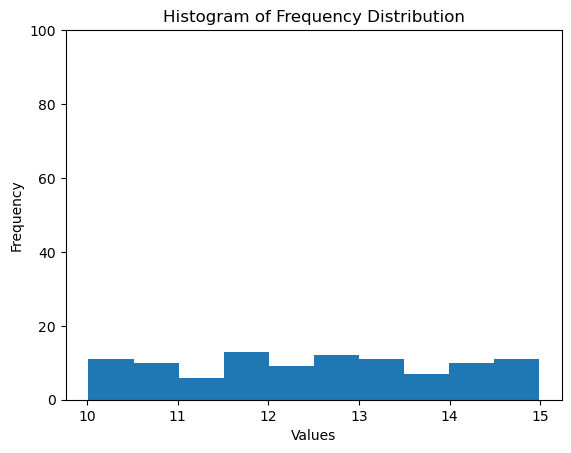

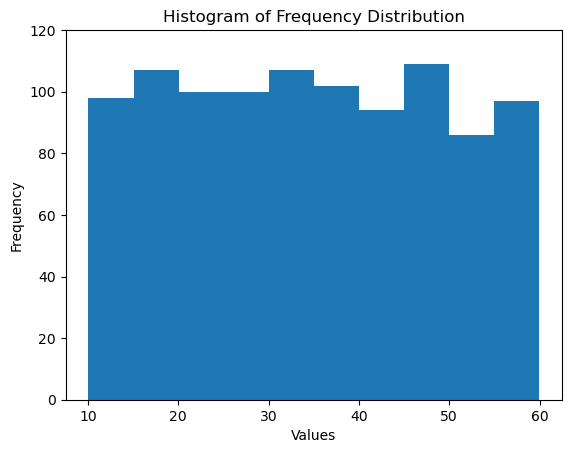

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [4]:
import matplotlib.pyplot as plt
plt.hist(x1, bins=10)  
plt.title('Histogram of Frequency Distribution')
plt.ylim(0,100)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

plt.hist(x2, bins=10)  
plt.ylim(0,120)
plt.title('Histogram of Frequency Distribution')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

plt.tight_layout

How are the two distributions different?

In [5]:
## For the first one the first Value is one of the highest and after that the frequency declines until the middle, where it 
# increase to highest amount. After that it declines as well

## in contrast for the second plot, the frequency increase in the beginining andis always increasing and decreasing for each
# second bin.

## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

Expected output:

![normal distribution](nd.png)

In [6]:
import numpy as np

def rand_normal(n, avg, std):
    return np.random.normal(loc=avg, scale=std, size=n)
z1 = rand_normal(1000, 10, 1)
z2 = rand_normal(1000, 10, 50)

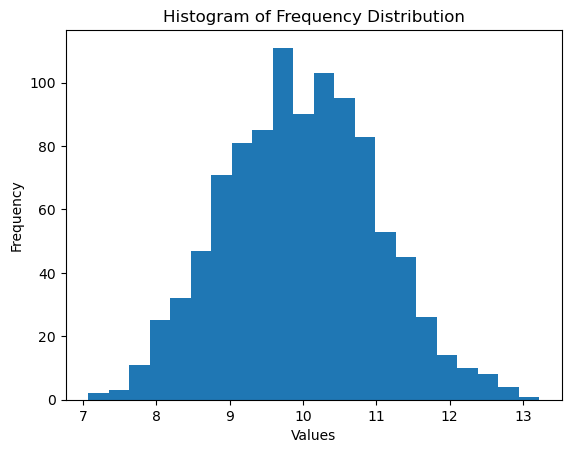

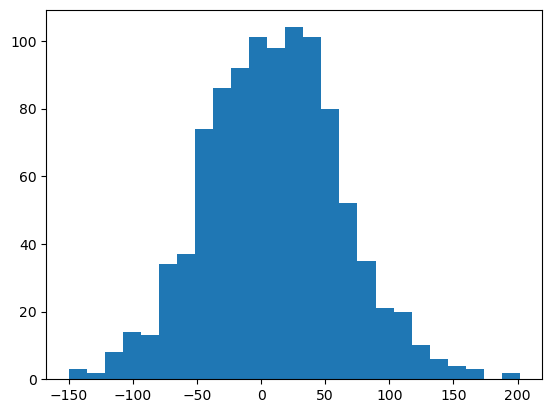

In [7]:
import matplotlib.pyplot as plt
plt.hist(z1, bins="auto")
plt.title('Histogram of Frequency Distribution')
plt.xlabel('Values')
plt.ylabel('Frequency')  
plt.show()

plt.hist(z2, bins="auto")
plt.show()

How are the two distributions different?

In [8]:
# first one more focused on the mean, more datapoints near to it. Mean itself higher compared to the rest
# second one has a lot wider and more flat shape. datapoint distributed over more points.


## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

First import vehicles.csv.
Then plot the histograms for the following variables:

1. Fuel Barrels/Year

In [9]:
import pandas as pd
df = pd.read_csv("vehicles.csv")
df.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


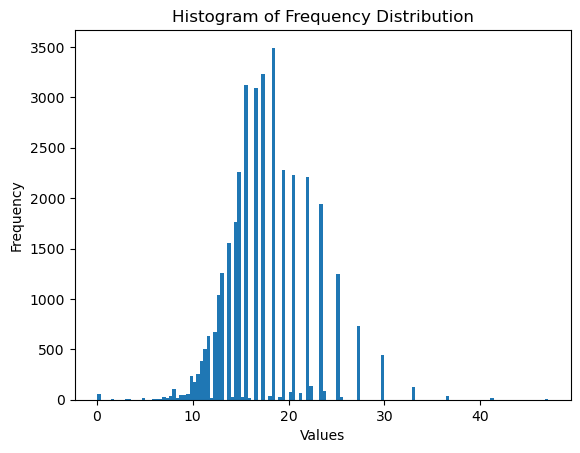

In [10]:
plt.hist(df['Fuel Barrels/Year'], bins='auto')  
plt.title('Histogram of Frequency Distribution')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

2. CO2 Emission Grams/Mile 

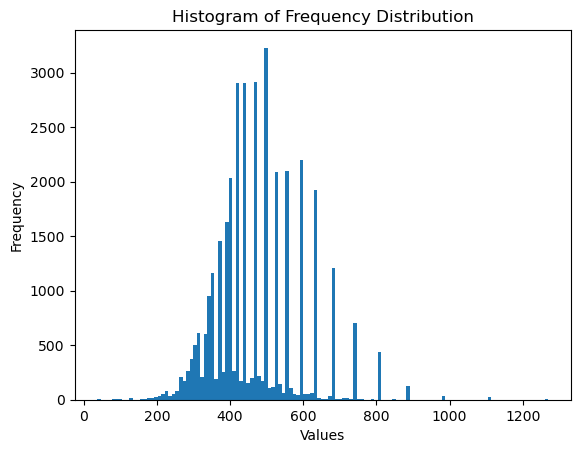

In [11]:
plt.hist(df['CO2 Emission Grams/Mile'], bins='auto')  
plt.title('Histogram of Frequency Distribution')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

3. Combined MPG

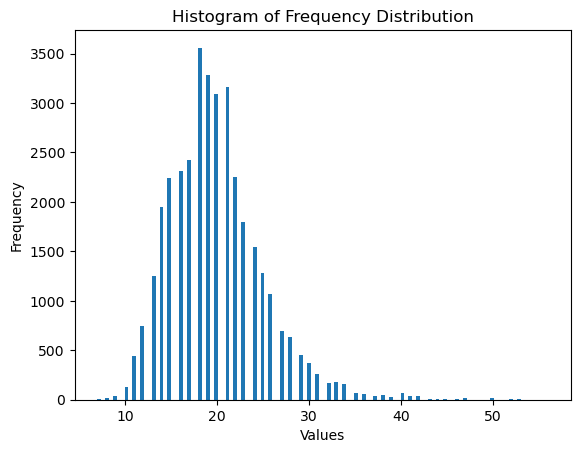

In [12]:
plt.hist(df['Combined MPG'], bins='auto')  
plt.title('Histogram of Frequency Distribution')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

Which one(s) of the variables are nearly normally distributed? How do you know?

In [13]:
# Combined MPG, as it is the only that is not a lot thicker at a certain point than the rest. however it has a positve
# skwedness (to the right)

## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 10. 

1. Use the function to generate two number sequences with a mean of 1 and 100 and a size of 1000.

1. Plot the distributions as histograms with the number of bins as 100.

Your output should look like below:

![exponential distribution](ed.png)

In [14]:
import numpy as np

def rand_exp(n, avg):
    return np.random.exponential(scale=avg, size=n)

z1 = rand_exp(1000, 1)
z2 = rand_exp(1000, 100)

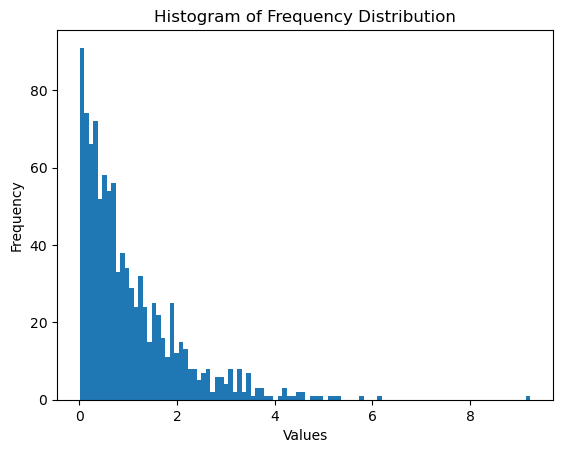

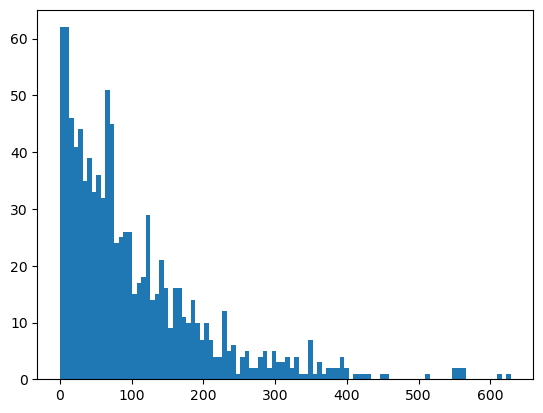

In [15]:
plt.hist(z1, bins=100)
plt.title('Histogram of Frequency Distribution')
plt.xlabel('Values')
plt.ylabel('Frequency')  
plt.show()

plt.hist(z2, bins=100)
plt.show()

How are the two distributions different?

In [16]:
# first one is a lot less wide, only focused on 1-4. After that it tends towards zero.
## second does the same but with range from 0-400.

## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

In [31]:
def rand_exp(n, mean):
    beta = 1 / mean
    return np.random.exponential(scale=beta, size=n)

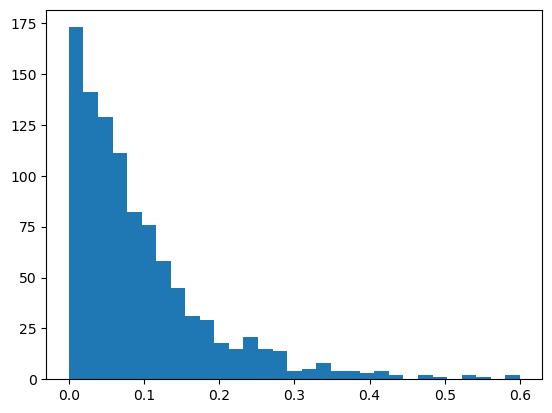

In [35]:
# your answer here
# Hint: This is same as saying P(x<15)
bank = rand_exp(1000, 10)
plt.hist(bank, bins="auto")
plt.show()

In [42]:
minutes = set()
dict = {}
bank = list(bank)
for i in bank:
    dict[i] = (bank.count(i))
df = pd.DataFrame({"Minutes":dict.keys()})
df["Count"] = dict.values()  
df["rel_freq"] = df["Count"] / sum(df["Count"])
df["cum_freq"] = df["rel_freq"].cumsum()
display(df)
p = df.iloc[0]["cum_freq"]
print(p)

,Minutes,Count,rel_freq,cum_freq
0,0.157543,1,0.001,0.001
1,0.092151,1,0.001,0.002
2,0.063136,1,0.001,0.003
3,0.043325,1,0.001,0.004
4,0.003409,1,0.001,0.005
...,...,...,...,...
995,0.081592,1,0.001,0.996
996,0.053717,1,0.001,0.997
997,0.006228,1,0.001,0.998
998,0.089662,1,0.001,0.999


0.001


What is the probability that the customer will spend more than 15 minutes

In [27]:
p2 = 1-p
print(p2)

0.0050000000000000044


In [28]:
import math 
p1 = 1 - math.exp(-(1/10)*15)

print(f"The probability that a customer will spend less than fifteen minutes in the bank is: {p1}")

The probability that a customer will spend less than fifteen minutes in the bank is: 0.7768698398515702


In [29]:
p2 = 1-p1
print(p2)

0.2231301601484298
